In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import importlib
import crypto_object
import datetime
import tqdm

%matplotlib inline

print('modules loaded')

modules loaded


In [3]:
crypto_object = importlib.reload(crypto_object)
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')

In [4]:
btc.full_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Pct Returns
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",0.015893
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",0.063828
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",-0.050474
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",0.085871
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",0.006640


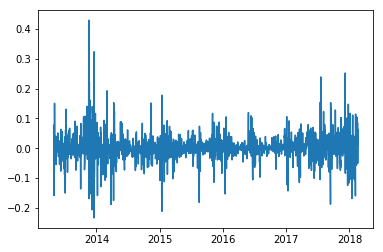

In [5]:
plt.plot(btc.full_data.loc[:,'Date'], btc.full_data.loc[:,'Pct Returns'])

In [6]:
(btc.full_data.loc[2,'Date'] - btc.full_data.loc[3,'Date']).days

1

In [7]:
import datetime

In [8]:
btc.full_data['Date'][btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")]

1   2018-02-19
Name: Date, dtype: datetime64[ns]

In [9]:
np.argwhere(btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d"))[0][0]

1

In [10]:
datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")

datetime.datetime(2018, 2, 19, 0, 0)

In [11]:
np.random.choice(btc.full_data['Pct Returns'])

-0.010670095926595473

In [17]:
import option_pricing as op

In [18]:
op = importlib.reload(op)

In [14]:
d1 = datetime.datetime.strptime('2016-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
out = op.random_paths(btc, d1, d2, lookback=60, N=50)

In [15]:
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
btc.full_data['Close'][(idx2):idx1].sort_index(ascending=False)

731     437.16
730     438.80
729     437.75
728     420.74
727     424.95
726     424.54
725     432.15
724     432.52
723     433.50
722     437.70
721     435.12
720     423.99
719     421.65
718     410.94
717     400.57
716     407.71
715     414.32
714     413.97
713     414.86
712     417.13
711     421.69
710     411.62
709     414.06
708     416.44
707     416.83
706     417.01
705     420.62
704     409.55
703     410.44
702     413.75
        ...   
395     921.79
394     924.67
393     921.01
392     892.69
391     901.54
390     917.59
389     919.75
388     921.59
387     919.50
386     920.38
385     970.40
384     989.02
383    1011.80
382    1029.91
381    1042.90
380    1027.34
379    1038.15
378    1061.35
377    1063.07
376     994.38
375     988.67
374    1004.45
373     999.18
372     990.64
371    1004.55
370    1007.48
369    1027.44
368    1046.21
367    1054.42
366    1047.87
Name: Close, Length: 366, dtype: float64

In [16]:
idx2

366

In [17]:
def plot_random_paths(rp, true_path, coin):
    
    f, ax = plt.subplots(1,1, figsize=(12,8))
    
    dates = rp.index
    
    rp = rp.sort_index(axis=0 ,ascending=False).values
    true_path = true_path.sort_index(ascending=False).values
    
    N = rp.shape[1]
    
    for i in np.arange(N):
        ax.plot(dates, rp[:, i], color='blue', alpha=.2)
        
    ax.plot(dates, true_path, color='red')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('{} Price'.format(coin.name))
    ax.set_title(coin.name)

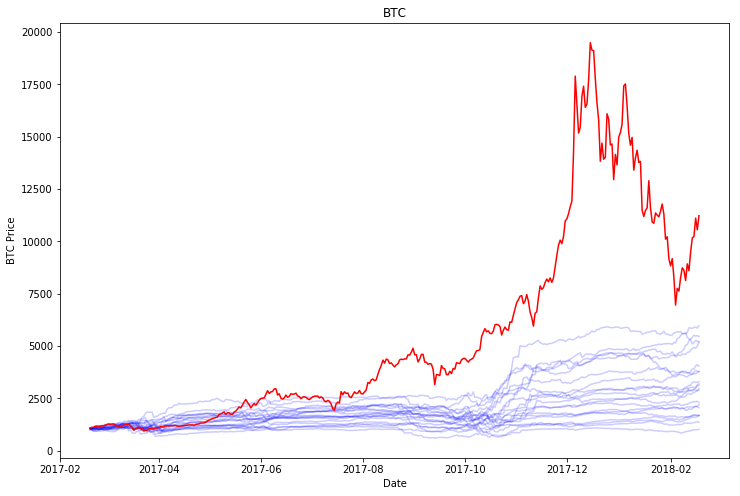

In [19]:
crypto_object = importlib.reload(crypto_object)
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')
d1 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
out = op.random_paths(btc, d1, d2, lookback=15, N=20)
plot_random_paths(out, btc.full_data['Close'][idx2:idx1].reset_index()['Close'], btc)

In [20]:
out.iloc[-1, :]

0     1068.630199
1     1041.360688
2     1067.013230
3     1068.630199
4     1071.287217
5     1050.926353
6     1061.086525
7     1032.235848
8     1032.235848
9     1071.287217
10    1066.625610
11    1041.360688
12    1068.630199
13     980.162144
14     980.162144
15    1067.013230
16    1058.896023
17    1061.086525
18    1042.372190
19    1068.630199
Name: 2018-02-18 00:00:00, dtype: float64

In [21]:
np.nanmax([np.nanmean(out.iloc[-1, :]), 0])

1049.981613793083

In [16]:
from importlib import reload # python 3
op = reload(op)

NameError: name 'op' is not defined

In [25]:
op.empirical_method(btc, d1, d2, 0, 5000, 'call', lookback=30, N=500)

113.69744460757053

In [ ]:
#####
# Options Strip
######

In [ ]:
def random_paths(coin, current_date, expiry_date, lookback=90, N=100):
    """
    Function that produces random crypto price curves based on a lookback window
    of historical values

    
    Parameters
    ----------

        coin : crypto_object.Coin


        current_date : Datetime
            t = 0 for the operation
    
        expiry_date : Datetime
            expiry date of the option

        lookback : int
            number of previous days to draw returns from

        N : int
            number of streams to create
    """

    # create data frame to store values
    N_days = (expiry_date - current_date).days 
    paths = np.empty((N_days, N))

    # ensure that lookback window is possible
    longest_lookback = current_date - timedelta(days=lookback)
    if longest_lookback not in set(coin.full_data['Date']):
        print('ERROR: lookback window not possible with current start date')
        sys.exit(1)

    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]

    for path_num in np.arange(N):

        # select a random return within lookback
        px = starting_price

        for offset in np.arange(N_days):

            # pct returns to select from
            lb_start = starting_index + offset
            lb_end = lb_start + lookback
            possible_returns = coin.full_data.loc[lb_start:(lb_end + 1), 'Pct Returns'].values
            px = px * (1 + np.random.choice(possible_returns))
            paths[N_days - offset - 1, path_num] = px

    paths = pd.DataFrame(paths)
    paths.index = [current_date + timedelta(days=int(x)) for x in np.arange(N_days)]
    return(paths)



def empirical_method(coin, current_date, expiry_date, r, K, call_or_put, lookback=90, N=100):
    """
    Function that uses the empirical distribution
    of crypto prices to calculate option prices. 

    
    Parameters
    ----------

        coin : crypto_object.Coin


        current_date : Datetime
            t = 0 for the operation
    
        expiry_date : Datetime
            expiry date of the option

        r : float
            risk-free interest rate

        K : float
            exercise price

        call_or_put : str
            option type

        lookback : int
            number of previous days to draw returns from

        N : int
            number of streams to create
    """

    rps = random_paths(coin, current_date, expiry_date, lookback=lookback, N=N)

    # final value for paths
    final_values = rps.iloc[0, :]

    # payout given final values
    if call_or_put == 'call':
        payout = [np.clip(x - K, 0, None) for x in final_values]
    elif call_or_put == 'put':
        payout = [np.clip(K - x, 0, None) for x in final_values]


    N_days = (expiry_date - current_date).days
    discount_factor = (1 + ((N_days/365) * r))**-1

    # get empirical price
    emp_price = np.nanmean(payout) * discount_factor

    # ensure that these prices obey the call /put inequalities
    if call_or_put == 'call':

        # call bounds S_t > C_k > max(S_t - KZ(t, T), 0)
        if emp_price < np.nanmax([np.nanmean(rps.iloc[-1, :] - (K * discount_factor)), 0]):
            return np.nanmax([np.nanmean(rps.iloc[-1, :] - (K * discount_factor)), 0])
        elif emp_price > np.nanmean(rps.iloc[-1, :]):
            return np.nanmean(rps.iloc[-1, :])

    else:

        # max(KZ(t, T) - S_t, 0) < P_k < KZ(t,T)
        if emp_price < np.nanmax([np.nanmean((K * discount_factor) - rps.iloc[-1, :]), 0]):
            return np.nanmax([np.nanmean((K * discount_factor) - rps.iloc[-1, :]), 0])
        elif emp_price > (K * discount_factor):
            return (K * discount_factor)

    return emp_price

In [12]:
def get_options_strip(coin, current_date, r, N_iter):
    
    # near and far dates
    near_term = current_date + datetime.timedelta(days=5)
    next_term = current_date + datetime.timedelta(days=30)
    
    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]
    
    # produces ks to search over
    ks_near = np.linspace(starting_price * .9, starting_price * 1.1, 10)
    ks_next = np.linspace(starting_price * .8, starting_price * 1.2, 20)
    
    # near term options
    near_term_calls = np.empty((10, ))
    near_term_puts = np.empty((10, ))
    
    # next term options
    next_term_calls = np.empty((20, ))
    next_term_puts = np.empty((20, ))
    
    for i, k in enumerate(ks_near):
        near_term_calls[i] = empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=5, N=N_iter)
        near_term_puts[i] = empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=5, N=N_iter)
        
    for i, k in enumerate(ks_next):
        next_term_calls[i] = empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=30, N=N_iter)
        next_term_puts[i] = empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=30, N=N_iter)
        
    near_term_df = pd.DataFrame([near_term_calls, near_term_puts]).T
    near_term_df.columns = ['Calls', 'Puts']
    near_term_df.index = ks_near
    next_term_df = pd.DataFrame([next_term_calls, next_term_puts]).T
    next_term_df.columns = ['Calls', 'Puts']
    next_term_df.index = ks_next
    
    return (near_term_df, next_term_df)

In [27]:
a = get_options_strip(btc, d1, 0, 100)[0]

In [28]:
a.loc[a.mean(axis=1).idxmin()]

Calls    22.765592
Puts      9.563283
Name: 1059.513, dtype: float64

In [29]:
a.loc[a.mean(axis=1).idxmin()]

Calls    22.765592
Puts      9.563283
Name: 1059.513, dtype: float64

In [30]:
pd.DataFrame([np.ones(5), np.ones(5)]).T

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [31]:
cls = a['Calls'].index.values

In [32]:
cls

array([ 943.083,  966.369,  989.655, 1012.941, 1036.227, 1059.513,
       1082.799, 1106.085, 1129.371, 1152.657])

In [33]:
cls[(1059.5129999999999 - cls).argmin()]

1152.657

In [34]:
cls = 1059.5129999999999 - cls

In [35]:
cls[cls > 0].argmin()

4

In [8]:
from __future__ import division

def closest_call_or_put(val, array, call_or_put):
    
    try:
        # loop through array and return propery idx
        if call_or_put == 'call':
            return min(array[array - val > 0])
        else:
            return max(array[val - array > 0])
    except:
        return val
        
        

def cryptoVix(coin, current_date, r, N_iter, N_paths):
    
    vix = np.empty((N_iter,))
    for i in np.arange(N_iter):
    
        # near and next options strip
        near_strip, next_strip = get_options_strip(coin, current_date, r, N_paths)

        # get idx where calls and puts differ the least
        near_closest_idx = near_strip.mean(axis=1).idxmin()
        next_closest_idx = next_strip.mean(axis=1).idxmin()

        T_1 = 5/365
        T_2 = 30/365

        # near and next forward prices
        F_near = near_closest_idx + (np.exp(r * T_1) * \
                    (near_strip.loc[near_closest_idx, 'Calls'] - \
                     near_strip.loc[near_closest_idx, 'Puts']))

        F_next = next_closest_idx + (np.exp(r * T_2) * \
                    (next_strip.loc[next_closest_idx, 'Calls'] - \
                     next_strip.loc[next_closest_idx, 'Puts']))

        # near/next strikes to find K_0s
        ks_near = near_strip.index.values
        ks_next = next_strip.index.values
        
        

        k_0_near_call = closest_call_or_put(near_closest_idx, ks_near, 'call')
        k_0_near_put = closest_call_or_put(near_closest_idx, ks_near, 'put')

        k_0_next_call = closest_call_or_put(next_closest_idx, ks_next, 'call')
        k_0_next_put = closest_call_or_put(next_closest_idx, ks_next, 'put')

        # strikes given by np.linspace so the delta for strikes is constant
        # therefore sufficient to calc one delta
        delta_near = np.abs((ks_near[1] - ks_near[0]) / 2)
        delta_next = np.abs((ks_next[1] - ks_next[0]) / 2)

        # near and next strikes for calls and puts to be calculated
        ks_near_puts = ks_near[ks_near < k_0_near_put]
        ks_near_calls = ks_near[ks_near > k_0_near_call]
        ks_next_puts = ks_next[ks_next < k_0_next_put]
        ks_next_calls = ks_next[ks_next > k_0_next_call]

        # calculate near vol
        near_sum = 0
        for k in ks_near_puts:
            near_sum = near_sum + near_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_near_calls:
            near_sum = near_sum + near_strip.loc[k, 'Calls'] / (k**2)

        sigma_2_near = (np.exp(r * T_1) * delta_near * (2 / T_1) * near_sum) - \
            ((1 / T_1) * (((F_near / np.nanmean([k_0_near_call, k_0_near_put])) - 1)**2))

        # calculate next vol
        next_sum = 0
        for k in ks_next_puts:
            next_sum += next_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_next_calls:
            next_sum += next_strip.loc[k, 'Calls'] / (k**2)


        sigma_2_next = (np.exp(r * T_2) * delta_next * (2 / T_2) * next_sum) - \
            ((1 / T_2) * (((F_next / np.nanmean([k_0_next_call, k_0_next_put])) - 1)**2))

        vix[i] = 100 * np.sqrt((T_1 * sigma_2_near) + (T_2 * sigma_2_next) * (365/30))
        
    return(np.nanmean(vix))

In [39]:
cryptoVix(btc, d1, 0, 20, 2) #reduced number of paths as test

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in sqrt


7.708027861907088

# VIX

Methodology:

* Create options strip 5 days in future and 30 days in future.
* Find forward price: strike at which call and put differs by the least amount.



In [9]:
import os
crypto_object = importlib.reload(crypto_object)

def load_coins(dir_):
    """
    Function to take in a directory containing data
    and return a dictionary of `Coin` objects
    """
    
    # to store data
    coin_dict = {}
    
    for filename in os.listdir(dir_):
        
        # price data
        if filename.endswith("_price.csv"):
            
            # coin name
            coin_name = filename.split('_')[0]
            
            coin_dict[coin_name] = crypto_object.Coin(coin_name, dir_ + filename)
            
    return coin_dict
coins = load_coins('cryptocurrencypricehistory/')

In [19]:
def coin_vix(coin, N_iter=4, N_paths=100):
    # create vix for a given coin
    
    # for replicability
    np.random.seed(109)
    dates = coin.full_data['Date'][:-31]
    vix = np.empty((len(dates,)))
    
    # create vix for each date
    for i in tqdm.trange(len(dates,)):
        
        vix[i] = cryptoVix(coin, dates[i], 0, N_iter, N_paths)

    out_series = pd.Series(vix)
    out_series.index = dates
    return out_series

In [22]:
qtum_vix = coin_vix(coins['qtum'], N_iter=1, N_paths=1)


 26%|██▌       | 63/242 [00:12<00:35,  5.09it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in sqrt
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:80: RuntimeWarning: Mean of empty slice
 98%|█████████▊| 237/242 [00:46<00:00,  5.12it/s]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
100%|█████████▉| 241/242 [00:47<00:00,  5.11it/s]/home/ubuntu/crypto109/option_pricing.py:124: RuntimeWarning: Mean of empty slice
  if emp_price < np.nanmax([np.nanmean(rps.iloc[-1, :] - (K * discount_factor)), 0]):
/home/ubuntu/crypto109/option_pricing.py:126: RuntimeWarning: Mean of empty slice
  elif emp_price > np.nanmean(rps.iloc[-1, :]):
100%|██████████| 242/242 [00:47<00:00,  5.11it/s]


In [23]:
qtum_vix

Date
2018-02-20     33.173870
2018-02-19     57.108276
2018-02-18     76.058946
2018-02-17     57.427237
2018-02-16     60.264158
2018-02-15     83.251576
2018-02-14     85.828320
2018-02-13     77.308856
2018-02-12     53.004741
2018-02-11     70.305705
2018-02-10     55.117759
2018-02-09     96.277330
2018-02-08     75.112943
2018-02-07     50.413347
2018-02-06     80.512995
2018-02-05     53.685321
2018-02-04     67.994081
2018-02-03     63.084480
2018-02-02     75.418014
2018-02-01     57.160008
2018-01-31     72.992980
2018-01-30     25.928354
2018-01-29     49.019569
2018-01-28     71.466401
2018-01-27     73.124826
2018-01-26     75.173827
2018-01-25     63.673588
2018-01-24     81.970252
2018-01-23     72.037039
2018-01-22     82.905553
                 ...    
2017-07-23     53.145701
2017-07-22     46.708292
2017-07-21     46.178988
2017-07-20     88.922279
2017-07-19     42.863498
2017-07-18     58.725503
2017-07-17     44.508635
2017-07-16     54.160785
2017-07-15     80.24

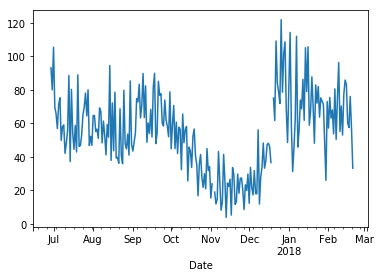

In [24]:
qtum_vix.plot()

In [25]:
qtum_vix[::-1].to_frame

<bound method Series.to_frame of Date
2017-06-24           NaN
2017-06-25           NaN
2017-06-26           NaN
2017-06-27     36.610434
2017-06-28           NaN
2017-06-29     93.144574
2017-06-30     79.965318
2017-07-01    105.475026
2017-07-02     69.602355
2017-07-03     65.629360
2017-07-04     56.836191
2017-07-05     71.055934
2017-07-06     75.258548
2017-07-07     49.800122
2017-07-08     57.926630
2017-07-09     59.051946
2017-07-10     41.988883
2017-07-11     48.185543
2017-07-12     55.602419
2017-07-13     88.552602
2017-07-14     37.142558
2017-07-15     80.248285
2017-07-16     54.160785
2017-07-17     44.508635
2017-07-18     58.725503
2017-07-19     42.863498
2017-07-20     88.922279
2017-07-21     46.178988
2017-07-22     46.708292
2017-07-23     53.145701
                 ...    
2018-01-22     82.905553
2018-01-23     72.037039
2018-01-24     81.970252
2018-01-25     63.673588
2018-01-26     75.173827
2018-01-27     73.124826
2018-01-28     71.466401
2018-01-29  

In [26]:
q_close = coins['qtum'].full_data.loc[:, ['Date', 'Close']]

In [27]:
b = q_close.join(qtum_vix[::-1].to_frame(), on='Date', how='left')

In [28]:
b

,Date,Close,0
0,2018-02-20,31.11,33.173870
1,2018-02-19,32.66,57.108276
2,2018-02-18,31.24,76.058946
3,2018-02-17,33.56,57.427237
4,2018-02-16,33.02,60.264158
5,2018-02-15,33.06,83.251576
6,2018-02-14,32.55,85.828320
7,2018-02-13,30.11,77.308856
8,2018-02-12,30.13,53.004741
9,2018-02-11,27.48,70.305705


In [29]:
b.columns[2]

0

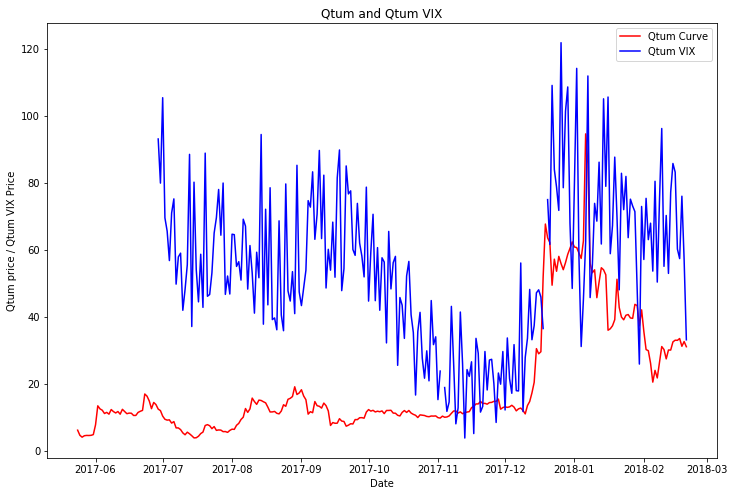

In [30]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax.plot(b['Date'], b['Close'], color='red', label='Qtum Curve')
ax.plot(b['Date'], b[0], color='blue', label='Qtum VIX')
ax.set_title('Qtum and Qtum VIX')
ax.set_ylabel('Qtum price / Qtum VIX Price')
ax.set_xlabel('Date')
ax.legend();

# Parallelize

These vix computations take several hours for each coin. Our team decided to do all the coins at once using a 36 Haskell core AWS CPU (2.9ghz) instance.

In [48]:
import multiprocessing

print(multiprocessing.cpu_count(), 'cores')

# We must import this explicitly, it is not imported by the top-level
# multiprocessing module.
import multiprocessing.pool
import time

from random import randint


class NoDaemonProcess(multiprocessing.Process):
    # make 'daemon' attribute always return False
    def _get_daemon(self):
        return False
    def _set_daemon(self, value):
        pass
    daemon = property(_get_daemon, _set_daemon)

# We sub-class multiprocessing.pool.Pool instead of multiprocessing.Pool
# because the latter is only a wrapper function, not a proper class.
class MyPool(multiprocessing.pool.Pool):
    Process = NoDaemonProcess

36 cores


In [49]:
coin_names = list(coins.keys())

print(coin_names)

['ethereum', 'omisego', 'stratis', 'numeraire', 'neo', 'qtum', 'ripple', 'nem', 'dash', 'litecoin', 'bitcoin', 'bitconnect', 'waves', 'iota', 'monero']


In [102]:
[coin_names[0]]

['ethereum']

In [154]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [186]:
import numpy as np
import pandas as pd
import crypto_object as co
import sys
from datetime import timedelta

def pathHelper(path_num, 
               starting_price, 
               N_days, 
               starting_index, 
               lookback,
               coin):
    # select a random return within lookback
    px = starting_price

    for offset in np.arange(N_days):

        # pct returns to select from
        lb_start = starting_index + offset
        lb_end = lb_start + lookback
        possible_returns = coin.full_data.loc[lb_start:(lb_end + 1), 'Pct Returns'].values
        px = px * (1 + np.random.choice(possible_returns))
        return {'px':px,'N_days':N_days,'offset':offset,'path_num':path_num}

def random_paths(coin, current_date, expiry_date, lookback=90, N=100):
    """
    Function that produces random crypto price curves based on a lookback window
    of historical values

    
    Parameters
    ----------

        coin : crypto_object.Coin


        current_date : Datetime
            t = 0 for the operation
    
        expiry_date : Datetime
            expiry date of the option

        lookback : int
            number of previous days to draw returns from

        N : int
            number of streams to create
    """

    # create data frame to store values
    N_days = (expiry_date - current_date).days 
    paths = np.empty((N_days, N))

    # ensure that lookback window is possible
    longest_lookback = current_date - timedelta(days=lookback)
    if longest_lookback not in set(coin.full_data['Date']):
        print('ERROR: lookback window not possible with current start date')
        sys.exit(1)

    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]

    

#    with MyPool(32) as p:        
 #       
  #      path_return = p.map(partial(pathHelper, 
   #            starting_price=starting_price, 
    #           N_days=N_days, 
     #          starting_index=starting_index, 
      #         lookback=lookback,
       #        coin=coin), np.arange(N_days))    
    
    
#    for each in path_return:
 #       paths[each['N_days'] - each['offset'] - 1, each['path_num']] = each['px'] 
    for path_num in np.arange(N):

        # select a random return within lookback
        px = starting_price

        for offset in np.arange(N_days):

            # pct returns to select from
            lb_start = starting_index + offset
            lb_end = lb_start + lookback
            possible_returns = coin.full_data.loc[lb_start:(lb_end + 1), 'Pct Returns'].values
            px = px * (1 + np.random.choice(possible_returns))
            paths[N_days - offset - 1, path_num] = px

    paths = pd.DataFrame(paths)
    paths.index = [current_date + timedelta(days=int(x)) for x in np.arange(N_days)]
    return(paths)



def empirical_method(coin, current_date, expiry_date, r, K, call_or_put, lookback=90, N=100):
    """
    Function that uses the empirical distribution
    of crypto prices to calculate option prices. 

    
    Parameters
    ----------

        coin : crypto_object.Coin


        current_date : Datetime
            t = 0 for the operation
    
        expiry_date : Datetime
            expiry date of the option

        r : float
            risk-free interest rate

        K : float
            exercise price

        call_or_put : str
            option type

        lookback : int
            number of previous days to draw returns from

        N : int
            number of streams to create
    """

    rps = random_paths(coin, current_date, expiry_date, lookback=lookback, N=N)

    # final value for paths
    final_values = rps.iloc[0, :]

    # payout given final values
    if call_or_put == 'call':
        payout = [np.clip(x - K, 0, None) for x in final_values]
    elif call_or_put == 'put':
        payout = [np.clip(K - x, 0, None) for x in final_values]


    N_days = (expiry_date - current_date).days
    discount_factor = (1 + ((N_days/365) * r))**-1

    # get empirical price
    emp_price = np.nanmean(payout) * discount_factor

    # ensure that these prices obey the call /put inequalities
    if call_or_put == 'call':

        # call bounds S_t > C_k > max(S_t - KZ(t, T), 0)
        if emp_price < np.nanmax([np.nanmean(rps.iloc[-1, :] - (K * discount_factor)), 0]):
            return np.nanmax([np.nanmean(rps.iloc[-1, :] - (K * discount_factor)), 0])
        elif emp_price > np.nanmean(rps.iloc[-1, :]):
            return np.nanmean(rps.iloc[-1, :])

    else:

        # max(KZ(t, T) - S_t, 0) < P_k < KZ(t,T)
        if emp_price < np.nanmax([np.nanmean((K * discount_factor) - rps.iloc[-1, :]), 0]):
            return np.nanmax([np.nanmean((K * discount_factor) - rps.iloc[-1, :]), 0])
        elif emp_price > (K * discount_factor):
            return (K * discount_factor)

    return emp_price

In [187]:
def get_options_strip(coin, current_date, r, N_iter):
    
    # near and far dates
    near_term = current_date + datetime.timedelta(days=5)
    next_term = current_date + datetime.timedelta(days=30)
    
    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]
    
    # produces ks to search over
    ks_near = np.linspace(starting_price * .9, starting_price * 1.1, 10)
    ks_next = np.linspace(starting_price * .8, starting_price * 1.2, 20)
    
    # near term options
    near_term_calls = np.empty((10, ))
    near_term_puts = np.empty((10, ))
    
    # next term options
    next_term_calls = np.empty((20, ))
    next_term_puts = np.empty((20, ))
    
    for i, k in enumerate(ks_near):
        near_term_calls[i] = empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=5, N=N_iter)
        near_term_puts[i] = empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=5, N=N_iter)
        
    for i, k in enumerate(ks_next):
        next_term_calls[i] = empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=30, N=N_iter)
        next_term_puts[i] = empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=30, N=N_iter)
        
    near_term_df = pd.DataFrame([near_term_calls, near_term_puts]).T
    near_term_df.columns = ['Calls', 'Puts']
    near_term_df.index = ks_near
    next_term_df = pd.DataFrame([next_term_calls, next_term_puts]).T
    next_term_df.columns = ['Calls', 'Puts']
    next_term_df.index = ks_next
    
    return (near_term_df, next_term_df)

In [200]:
crypto_object = importlib.reload(crypto_object)
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')
d1 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
out = op.random_paths(btc, d1, d2, lookback=15, N=20)
plot_random_paths(out, btc.full_data['Close'][idx2:idx1].reset_index()['Close'], btc)

NameError: name 'plot_random_paths' is not defined

In [ ]:
a = get_options_strip(btc, d1, 0, 100)[0]

In [188]:
def cryptoVixHelper(i, coin, current_date, r, N_iter, N_paths):
    # near and next options strip
    near_strip, next_strip = get_options_strip(coin, current_date, r, N_paths)

    # get idx where calls and puts differ the least
    near_closest_idx = near_strip.mean(axis=1).idxmin()
    next_closest_idx = next_strip.mean(axis=1).idxmin()

    T_1 = 5/365
    T_2 = 30/365

    # near and next forward prices
    F_near = near_closest_idx + (np.exp(r * T_1) * \
                (near_strip.loc[near_closest_idx, 'Calls'] - \
                 near_strip.loc[near_closest_idx, 'Puts']))

    F_next = next_closest_idx + (np.exp(r * T_2) * \
                (next_strip.loc[next_closest_idx, 'Calls'] - \
                 next_strip.loc[next_closest_idx, 'Puts']))

    # near/next strikes to find K_0s
    ks_near = near_strip.index.values
    ks_next = next_strip.index.values



    k_0_near_call = closest_call_or_put(near_closest_idx, ks_near, 'call')
    k_0_near_put = closest_call_or_put(near_closest_idx, ks_near, 'put')

    k_0_next_call = closest_call_or_put(next_closest_idx, ks_next, 'call')
    k_0_next_put = closest_call_or_put(next_closest_idx, ks_next, 'put')

    # strikes given by np.linspace so the delta for strikes is constant
    # therefore sufficient to calc one delta
    delta_near = np.abs((ks_near[1] - ks_near[0]) / 2)
    delta_next = np.abs((ks_next[1] - ks_next[0]) / 2)

    # near and next strikes for calls and puts to be calculated
    ks_near_puts = ks_near[ks_near < k_0_near_put]
    ks_near_calls = ks_near[ks_near > k_0_near_call]
    ks_next_puts = ks_next[ks_next < k_0_next_put]
    ks_next_calls = ks_next[ks_next > k_0_next_call]

    # calculate near vol
    near_sum = 0
    for k in ks_near_puts:
        near_sum = near_sum + near_strip.loc[k, 'Puts'] / (k**2)
    for k in ks_near_calls:
        near_sum = near_sum + near_strip.loc[k, 'Calls'] / (k**2)

    sigma_2_near = (np.exp(r * T_1) * delta_near * (2 / T_1) * near_sum) - \
        ((1 / T_1) * (((F_near / np.nanmean([k_0_near_call, k_0_near_put])) - 1)**2))

    # calculate next vol
    next_sum = 0
    for k in ks_next_puts:
        next_sum += next_strip.loc[k, 'Puts'] / (k**2)
    for k in ks_next_calls:
        next_sum += next_strip.loc[k, 'Calls'] / (k**2)


    sigma_2_next = (np.exp(r * T_2) * delta_next * (2 / T_2) * next_sum) - \
        ((1 / T_2) * (((F_next / np.nanmean([k_0_next_call, k_0_next_put])) - 1)**2))

    return (100 * np.sqrt((T_1 * sigma_2_near) + (T_2 * sigma_2_next) * (365/30)))        



In [189]:
from functools import partial

def cryptoVixParallel(coin, current_date, r, N_iter, N_paths):
    vix = np.empty((N_iter,))
    
    with MyPool(32) as p:
        
        
        vix = p.map(partial(cryptoVixHelper, coin=coin, 
                                              current_date=current_date, 
                                              r=r, 
                                              N_iter=N_iter, 
                                              N_paths=N_paths), np.arange(N_iter))
    
    return (np.nanmean(vix))

In [190]:
def coin_vix(coin, N_iter=4, N_paths=100):
    # create vix for a given coin
    
    # for replicability
    np.random.seed(109)
    dates = coin.full_data['Date'][:-31]
    vix = np.empty((len(dates,)))
    
    # create vix for each date
    for i in tqdm.trange(len(dates,)):
        
        vix[i] = cryptoVixParallel(coin, dates[i], 0, N_iter, N_paths)

    out_series = pd.Series(vix)
    out_series.index = dates
    return out_series

In [191]:
for coin in coin_names:
    print(coin, len(coins[coin].full_data))

ethereum 577
omisego 222
stratis 558
numeraire 243
neo 530
qtum 273
ripple 1662
nem 1057
dash 1468
litecoin 1760
bitcoin 213
bitconnect 397
waves 629
iota 253
monero 1371


In [210]:
print(coin_names[0:5])
print(coin_names[5:10])
print(coin_names[10:15])




['ethereum', 'omisego', 'stratis', 'numeraire', 'neo']
['qtum', 'ripple', 'nem', 'dash', 'litecoin']
['bitcoin', 'bitconnect', 'waves', 'iota', 'monero']


In [199]:

def f(coin_name):
    try:
        x = coin_vix(coins[coin_name], N_iter=4, N_paths=100)
        return (coin_name,x)
    except:
        return (coin_name,'failed')
    
coin_vixes = []

if __name__ == '__main__':
    with MyPool(32) as p:
        coin_vixes = (p.map(f, coin_names[1:5]))

 20%|█▉        | 98/499 [00:58<04:00,  1.67it/s]]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in sqrt
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in sqrt
 60%|██████    | 115/191 [01:02<00:41,  1.85it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in sqrt
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: Mean of empty slice
 32%|███▏      | 169/527 [01:42<03:36,  1.65it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:147: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:147: RuntimeWarning: Mean of empty slice
 34%|███▍      | 172/499 [01:42<03:15,  1.68it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:147: Runt

100%|█████████▉| 526/527 [05:14<00:00,  1.67it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:147: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:147: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:153: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:155: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:153: RuntimeWarning: Mean of empty slice
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:155: RuntimeWarning: Mean of empty slice
100%|██████████| 527/527 [05:15<00:00,  1.67it/s]


In [211]:
coin_vixes[1]

('stratis', Date
 2018-02-20    27.693609
 2018-02-19    68.248827
 2018-02-18    58.940381
 2018-02-17    56.323490
 2018-02-16    63.804325
 2018-02-15    34.002098
 2018-02-14    66.297572
 2018-02-13    69.616719
 2018-02-12    54.566514
 2018-02-11    47.868174
 2018-02-10    41.054629
 2018-02-09    38.711937
 2018-02-08    65.526131
 2018-02-07    48.411872
 2018-02-06    69.436864
 2018-02-05    67.987432
 2018-02-04    55.618884
 2018-02-03    40.105668
 2018-02-02    77.990704
 2018-02-01    63.781312
 2018-01-31    50.769934
 2018-01-30    51.461718
 2018-01-29    53.419656
 2018-01-28    67.412077
 2018-01-27    62.885164
 2018-01-26    45.761154
 2018-01-25    70.704380
 2018-01-24    63.927885
 2018-01-23    65.351613
 2018-01-22    91.710223
                 ...    
 2016-10-11    26.124600
 2016-10-10    30.771252
 2016-10-09    44.177801
 2016-10-08    24.257422
 2016-10-07    55.727072
 2016-10-06    74.067564
 2016-10-05    43.486989
 2016-10-04    63.964064
 2016-10

In [215]:
# store objects in file
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


In [216]:
save_object(coin_vixes[1], '2_paths/test.pkl')

In [219]:
with open("2_paths/test.pkl", "rb") as input_file:
    vix_data_test = pickle.load(input_file)

In [220]:
vix_data_test

('stratis', Date
 2018-02-20    27.693609
 2018-02-19    68.248827
 2018-02-18    58.940381
 2018-02-17    56.323490
 2018-02-16    63.804325
 2018-02-15    34.002098
 2018-02-14    66.297572
 2018-02-13    69.616719
 2018-02-12    54.566514
 2018-02-11    47.868174
 2018-02-10    41.054629
 2018-02-09    38.711937
 2018-02-08    65.526131
 2018-02-07    48.411872
 2018-02-06    69.436864
 2018-02-05    67.987432
 2018-02-04    55.618884
 2018-02-03    40.105668
 2018-02-02    77.990704
 2018-02-01    63.781312
 2018-01-31    50.769934
 2018-01-30    51.461718
 2018-01-29    53.419656
 2018-01-28    67.412077
 2018-01-27    62.885164
 2018-01-26    45.761154
 2018-01-25    70.704380
 2018-01-24    63.927885
 2018-01-23    65.351613
 2018-01-22    91.710223
                 ...    
 2016-10-11    26.124600
 2016-10-10    30.771252
 2016-10-09    44.177801
 2016-10-08    24.257422
 2016-10-07    55.727072
 2016-10-06    74.067564
 2016-10-05    43.486989
 2016-10-04    63.964064
 2016-10

In [ ]:
a = get_options_strip(btc, d1, 0, 100)[0]